<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Stock_Price_Forecasting_with_yfinance_FB_Prophet_and_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment: IBM Specialized Models
### Stock Price Forecasting with yfinance and Facebook Prophet

## Importing all the necessary Libraries

In [2]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [3]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: TOU.TO
You entered TOU.TO, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
745,2021-07-12,33.759998,33.849998,33.410000,33.740002,1321000,0.0,0
746,2021-07-13,33.990002,34.900002,33.610001,34.860001,920700,0.0,0
747,2021-07-14,34.880001,35.439999,34.400002,34.480000,1212900,0.0,0
748,2021-07-15,34.200001,34.900002,33.700001,33.959999,1047600,0.0,0
749,2021-07-16,35.200001,35.299999,33.240002,33.570000,1267300,0.0,0
750,2021-07-19,31.139999,33.759998,31.059999,33.299999,1496500,0.0,0
751,2021-07-20,33.400002,34.340000,33.240002,33.650002,896700,0.0,0
752,2021-07-21,34.080002,34.770000,33.709999,34.299999,1374900,0.0,0
753,2021-07-22,34.400002,34.470001,33.840000,34.110001,691800,0.0,0
754,2021-07-23,34.220001,34.840000,33.869999,34.770000,704422,0.0,0


In [4]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.0
mean,17.420417,17.740253,17.096890,17.410341,1.282536e+06,0.001960,0.0
std,5.579022,5.646201,5.526373,5.588773,1.055592e+06,0.015634,0.0
min,6.882140,7.200222,6.486947,6.544780,1.218000e+05,0.000000,0.0
25%,13.147394,13.383546,12.886752,13.150390,7.643500e+05,0.000000,0.0
50%,16.735690,17.025270,16.462073,16.759079,1.071900e+06,0.000000,0.0
75%,19.572418,19.867258,19.304898,19.508207,1.489450e+06,0.000000,0.0
max,35.990002,36.180000,35.330002,36.139999,1.593540e+07,0.160000,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [5]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [6]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [7]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [8]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet
__[Facebook Prophet Documentation](https://facebook.github.io/prophet/)__. 

In [9]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
750,2021-07-19,33.299999
751,2021-07-20,33.650002
752,2021-07-21,34.299999
753,2021-07-22,34.110001
754,2021-07-23,34.770000


##Facebook Prophet Model

In [10]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [11]:
periods = 10
future=m.make_future_dataframe(periods)

In [12]:
forecast=m.predict(future)

In [13]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-23,20.560628,19.810471,22.882612,20.560628,20.560628,0.775459,0.775459,0.775459,-0.295401,-0.295401,-0.295401,1.070860,1.070860,1.070860,0.0,0.0,0.0,21.336087
1,2018-07-24,20.538270,19.859803,22.862547,20.538270,20.538270,0.819938,0.819938,0.819938,-0.257165,-0.257165,-0.257165,1.077103,1.077103,1.077103,0.0,0.0,0.0,21.358208
2,2018-07-25,20.515912,19.836078,22.804988,20.515912,20.515912,0.839242,0.839242,0.839242,-0.244702,-0.244702,-0.244702,1.083944,1.083944,1.083944,0.0,0.0,0.0,21.355153
3,2018-07-26,20.493553,19.649623,22.816601,20.493553,20.493553,0.759343,0.759343,0.759343,-0.332120,-0.332120,-0.332120,1.091463,1.091463,1.091463,0.0,0.0,0.0,21.252896
4,2018-07-27,20.471195,19.881477,22.768384,20.471195,20.471195,0.846196,0.846196,0.846196,-0.253497,-0.253497,-0.253497,1.099693,1.099693,1.099693,0.0,0.0,0.0,21.317391
5,2018-07-30,20.404120,19.783618,22.822098,20.404120,20.404120,0.832717,0.832717,0.832717,-0.295401,-0.295401,-0.295401,1.128118,1.128118,1.128118,0.0,0.0,0.0,21.236837
6,2018-07-31,20.381762,19.885712,22.797739,20.381762,20.381762,0.881212,0.881212,0.881212,-0.257165,-0.257165,-0.257165,1.138377,1.138377,1.138377,0.0,0.0,0.0,21.262975
7,2018-08-01,20.359404,19.828733,22.811752,20.359404,20.359404,0.903959,0.903959,0.903959,-0.244702,-0.244702,-0.244702,1.148661,1.148661,1.148661,0.0,0.0,0.0,21.263363
8,2018-08-02,20.337046,19.608485,22.635330,20.337046,20.337046,0.826552,0.826552,0.826552,-0.332120,-0.332120,-0.332120,1.158673,1.158673,1.158673,0.0,0.0,0.0,21.163598
9,2018-08-03,20.314687,19.627168,22.684840,20.314687,20.314687,0.914577,0.914577,0.914577,-0.253497,-0.253497,-0.253497,1.168074,1.168074,1.168074,0.0,0.0,0.0,21.229265


In [14]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

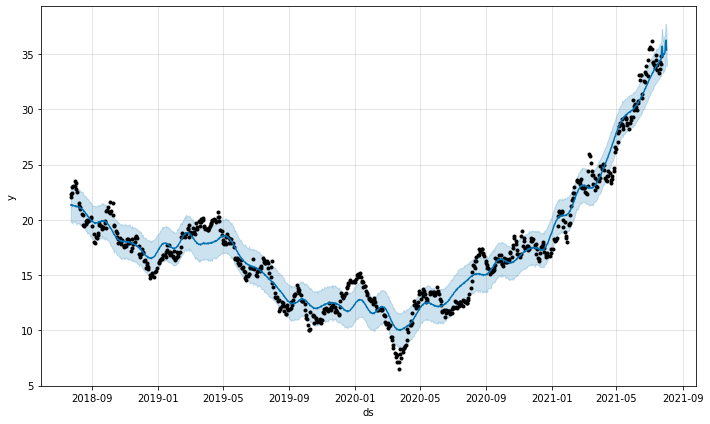

In [15]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

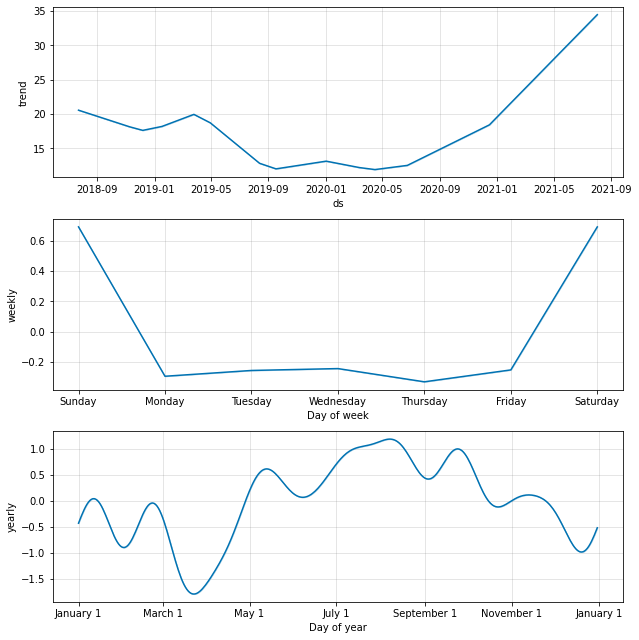

In [16]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [17]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ARIMA Model
This is an Autoregressive Integrated Moving Average Model

```
# This is formatted as code
```

.

In [18]:
#!pip install pmdarima
import pmdarima as pm
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Data Preparation for ARIMA

In [25]:
# Set stock ticker period to max 
arima_period = 'max'
arima_data = ticker.history(arima_period) # Same ticker as prophet model
print(stock)
arima_df=pd.DataFrame(arima_data,columns=['Close'])
arima_df.tail()

TOU.TO


,Close
Date,
2021-07-19,33.299999
2021-07-20,33.650002
2021-07-21,34.299999
2021-07-22,34.110001
2021-07-23,34.770000


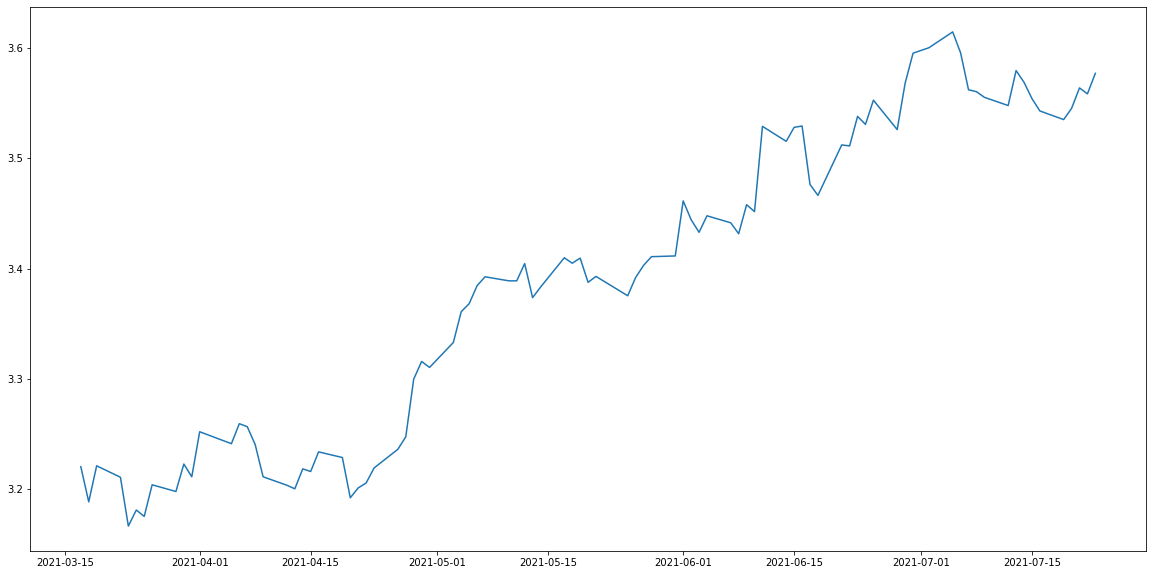

In [36]:
#to reduce the difference in variance we will take log of data

arima_df['log_close'] = np.log1p(arima_df['Close'])
# zoom in on last 30 days
plt.figure(figsize=(20,10))
plt.plot(arima_df['log_close'][-90:])

In [38]:
# Resample to Months
months_mean_close = arima_df['log_close'].resample('M').mean().to_frame()
months_mean_close.head()

,log_close
Date,
2010-11-30,2.974060
2010-12-31,2.983879
2011-01-31,3.087361
2011-02-28,3.128725
2011-03-31,3.179173


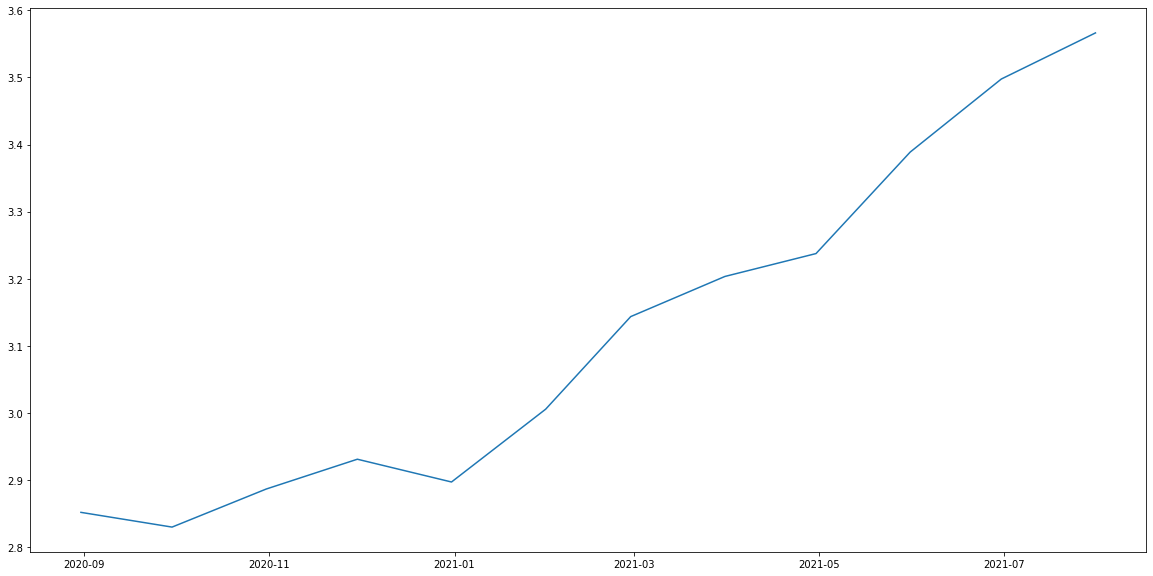

In [42]:
# zoom in on last 12 months
plt.figure(figsize=(20,10))
plt.plot(months_mean_close[-12:])

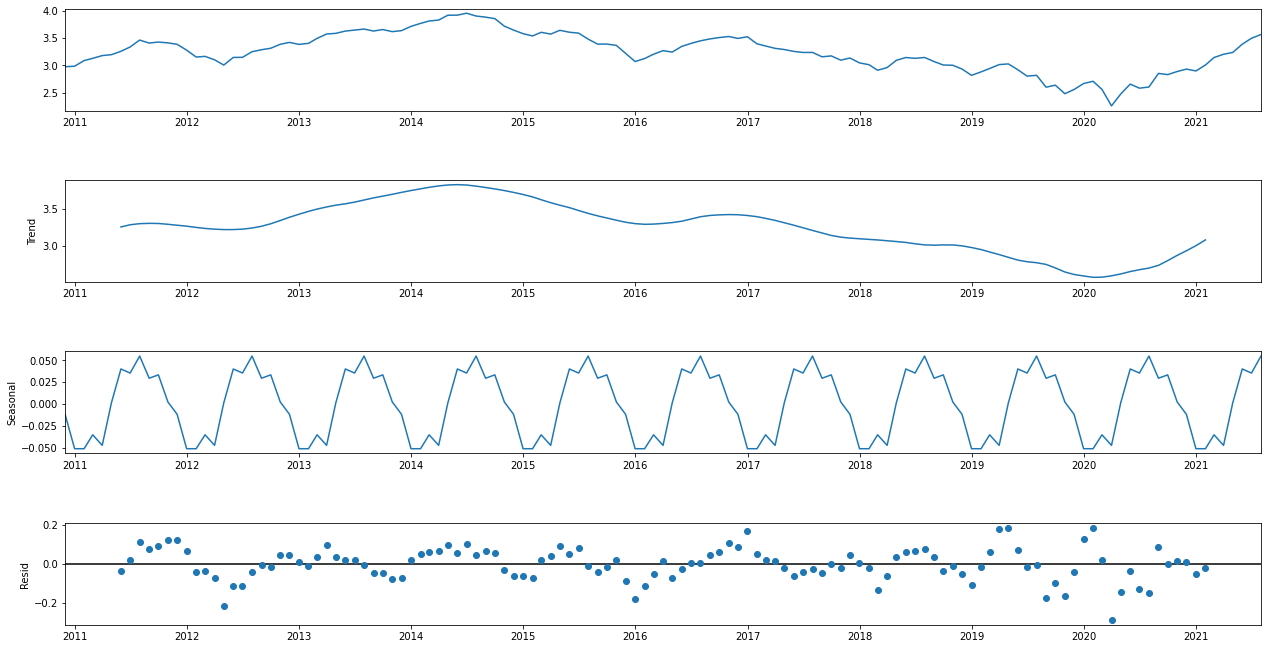

In [43]:
# plot decomposition with 12 months frequency to capture seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
figure = seasonal_decompose(months_mean_close,period=12).plot()
figure.set_size_inches(20, 10)

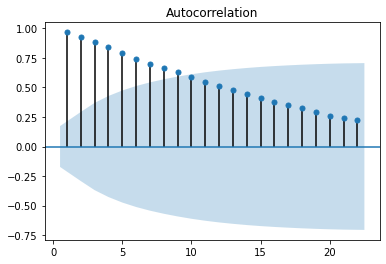

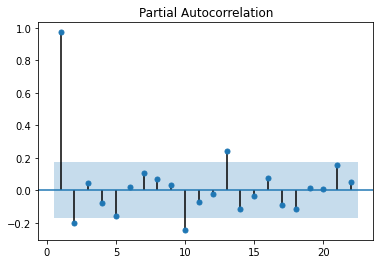

In [44]:
sm.tsa.graphics.plot_acf(months_mean_close,zero=False)
sm.tsa.graphics.plot_pacf(months_mean_close,zero=False);

In [45]:
months_mean_close['lag_12'] = months_mean_close.shift(12)
months_mean_close

,log_close,lag_12
Date,,
2010-11-30,2.974060,NaN
2010-12-31,2.983879,NaN
2011-01-31,3.087361,NaN
2011-02-28,3.128725,NaN
2011-03-31,3.179173,NaN
...,...,...
2021-03-31,3.203305,2.254911
2021-04-30,3.237439,2.473057
2021-05-31,3.388724,2.655171


In [46]:
months_mean_close['year_diff'] = months_mean_close['log_close'] - months_mean_close['lag_12']
months_mean_close['year_diff'].dropna().to_frame()

,year_diff
Date,
2011-11-30,0.412559
2011-12-31,0.295550
2012-01-31,0.065202
2012-02-29,0.035803
2012-03-31,-0.077093
...,...
2021-03-31,0.948394
2021-04-30,0.764382
2021-05-31,0.733553


In [47]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -1.622565
p-value                   0.471385
Lags Used                12.000000
Observations Used       104.000000
Critical Value (1%)      -3.494850
Critical Value (5%)      -2.889758
Critical Value (10%)     -2.581822
dtype: float64


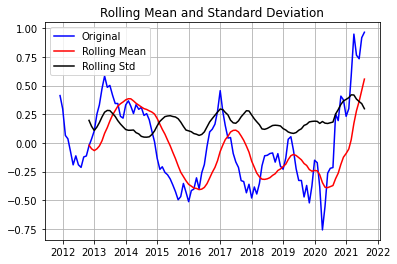

In [48]:
# rund DF test, p-value more than 0.05 we fail to reject the null of non stationarity
dftest(months_mean_close['year_diff'].dropna())

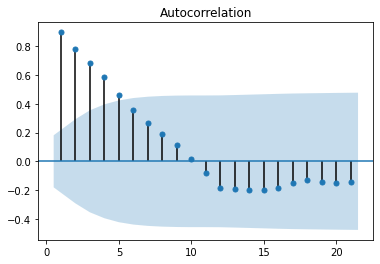

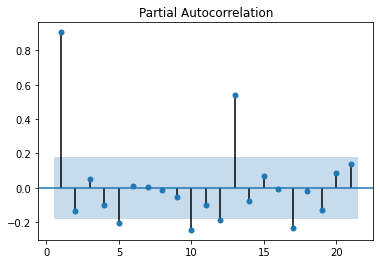

In [49]:
sm.tsa.graphics.plot_acf(months_mean_close['year_diff'].dropna(),zero=False)
sm.tsa.graphics.plot_pacf(months_mean_close['year_diff'].dropna(),zero=False);

In [62]:
sar = sm.tsa.statespace.SARIMAX(arima_df.log_close, 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()

print(sar.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                SARIMAX Results                                 
Dep. Variable:                log_close   No. Observations:                 2677
Model:             SARIMAX(0, 1, 0, 10)   Log Likelihood                3277.102
Date:                  Fri, 23 Jul 2021   AIC                          -6550.204
Time:                          20:50:43   BIC                          -6538.426
Sample:                               0   HQIC                         -6545.942
                                 - 2677                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.001      1.597      0.110      -0.000       0.005
sigma2         0.0050      0.000     49.748      0.000       0.005       0.005
Ljung-Box (L1) (Q):                2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Run the diagnostics with no lag

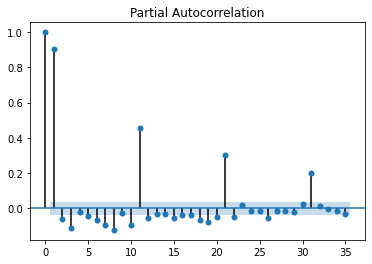

In [63]:
sm.tsa.graphics.plot_pacf(sar.resid[sar.loglikelihood_burn:]);

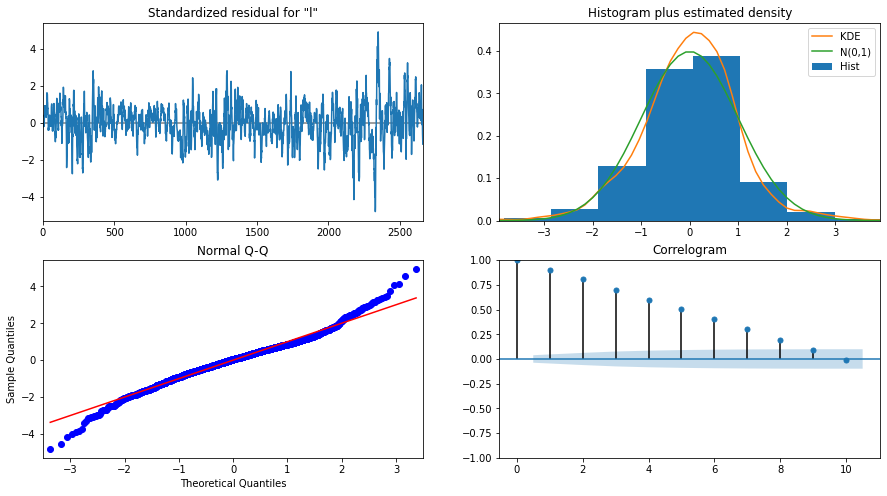

In [64]:
sar.plot_diagnostics(figsize = (15,8));

Create an Auto Model to find the best Model with Seasonality (Best Orders Fit)

In [65]:
auto_model = pm.auto_arima(arima_df.log_close, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[10] intercept   : AIC=-6548.330, Time=3.11 sec
 ARIMA(0,0,0)(0,1,0)[10] intercept   : AIC=-6550.204, Time=0.88 sec
 ARIMA(1,0,0)(1,1,0)[10] intercept   : AIC=-11817.895, Time=9.99 sec
 ARIMA(0,0,1)(0,1,1)[10] intercept   : AIC=-8839.872, Time=9.61 sec
 ARIMA(0,0,0)(0,1,0)[10]             : AIC=-6549.651, Time=0.25 sec
 ARIMA(1,0,0)(0,1,0)[10] intercept   : AIC=-11078.368, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[10] intercept   : AIC=-12108.153, Time=26.02 sec
 ARIMA(1,0,0)(2,1,1)[10] intercept   : AIC=inf, Time=39.68 sec
 ARIMA(1,0,0)(1,1,1)[10] intercept   : AIC=inf, Time=17.81 sec
 ARIMA(0,0,0)(2,1,0)[10] intercept   : AIC=-6549.252, Time=9.63 sec
 ARIMA(2,0,0)(2,1,0)[10] intercept   : AIC=-12112.505, Time=34.93 sec
 ARIMA(2,0,0)(1,1,0)[10] intercept   : AIC=-11823.554, Time=21.22 sec
 ARIMA(2,0,0)(2,1,1)[10] intercept   : AIC=inf, Time=42.94 sec
 ARIMA(2,0,0)(1,1,1)[10] intercept   : AIC=inf, Time=21.00 sec
 ARIMA(3,0,0)(2,1

In [67]:
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

order:  (1, 0, 2)
seasonal order:  (2, 1, 0, 10)


In [71]:
sar2 = sm.tsa.statespace.SARIMAX(arima_df.log_close, 
                                order=auto_model.order, 
                                seasonal_order=auto_model.seasonal_order, 
                                trend='c').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



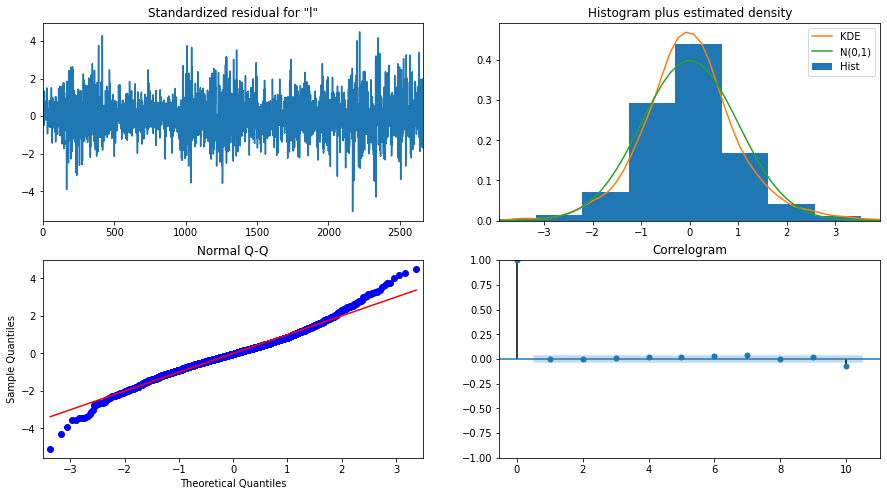

In [73]:
sar2.plot_diagnostics(figsize = (15,8));

Create an Auto Model to find the best Model without Seasonality

In [109]:
auto_model = pm.auto_arima(arima_df.log_close, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=False,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13939.285, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12840.820, Time=1.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12839.342, Time=1.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12846.146, Time=2.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1435.774, Time=0.93 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12842.658, Time=5.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-12844.739, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2053.248, Time

In [110]:
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

order:  (1, 0, 1)
seasonal order:  (0, 0, 0, 0)


In [111]:
sar3 = sm.tsa.statespace.SARIMAX(arima_df.log_close, 
                                order=auto_model.order, 
                                seasonal_order=auto_model.seasonal_order, 
                                trend='c').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



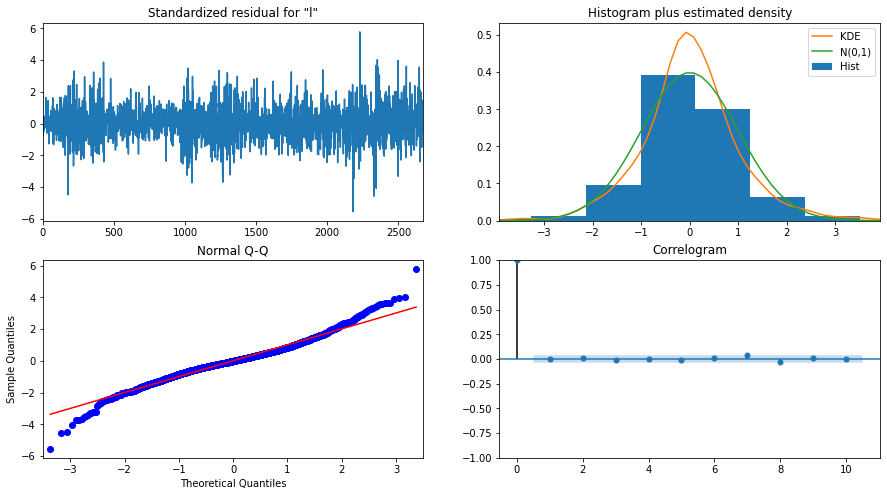

In [112]:
sar3.plot_diagnostics(figsize = (15,8));